Import library

In [1]:
import pandas as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

read dataset

In [5]:
import pandas as pd

# Load pulse data
pulse_data = pd.read_csv('D:/CodingStorage/flutter/yolodetection/assets/pulse.csv')  # Replace with your file path
pulse_data['timestamp'] = pd.to_datetime(pulse_data['timestamp'], unit='ms')  # Convert timestamp to datetime
pulse_data.set_index('timestamp', inplace=True)  # Set timestamp as the index

# Resample to 1-second intervals and interpolate missing values
pulse_data = pulse_data.resample('1S').mean()
pulse_data.interpolate(method='linear', inplace=True)

# Define a threshold for Awake/Drowsy classification
awake_threshold = 90
pulse_data['state'] = pulse_data['value'].apply(lambda x: 'Awake' if x >= awake_threshold else 'Drowsy')
pulse_data['is_awake'] = pulse_data['state'] == 'Awake'

# Save the processed data to a CSV file
pulse_data.to_csv('processed_pulse_data.csv')


C:\Users\Afiq\AppData\Local\Temp\ipykernel_48884\2243809311.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  pulse_data = pulse_data.resample('1S').mean()


In [7]:
%pip install scikit-learn

import numpy as np
from sklearn.model_selection import train_test_split

# Define sequence length (e.g., 10 seconds)
sequence_length = 10  # You can adjust this as needed
pulse_values = pulse_data['value'].values  # Extract the heart rate values as a NumPy array

# Create sequences and corresponding labels (next value prediction)
sequences = []
labels = []
for i in range(len(pulse_values) - sequence_length):
    sequences.append(pulse_values[i:i + sequence_length])
    labels.append(pulse_values[i + sequence_length])

# Convert to NumPy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Save datasets for LSTM model
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 509.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.1 MB 509.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.1 MB 509.0 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/11.1 MB 459.9 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/11.1 MB 459.9 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/11.1 MB 459.9 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/11.1 MB 461.8 kB/s eta 0:00:22
   --- ------------------------------------ 1.0/11.1 MB 461.8 kB/s eta 0:00:22
   ---- ---------

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load preprocessed datasets
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Reshape input data to match LSTM input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression (heart rate prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,  # Number of training iterations
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Save the trained model
model.save('lstm_heart_rate_model.h5')


d:\CodingStorage\flutter\yolodetection\.conda\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 9497.9316 - mae: 93.3616 - val_loss: 8120.4736 - val_mae: 85.6999
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7822.2471 - mae: 84.0992 - val_loss: 7083.8940 - val_mae: 79.4223
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6822.8540 - mae: 77.8523 - val_loss: 6183.0630 - val_mae: 73.5328
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6021.4985 - mae: 72.3986 - val_loss: 5387.9380 - val_mae: 67.9113
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5178.0845 - mae: 66.4505 - val_loss: 4684.5176 - val_mae: 62.5182
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4555.9380 - mae: 61.4311 - val_loss: 4066.2649 - val_mae: 57.3609
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3913.7922 - mae: 56.0500 - val_loss: 3522.0645 - val_mae: 52.4089
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3470.0774 - mae: 51.7175 - val_loss: 3047.6416 - val_mae:

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 825.0560 - mean_absolute_error: 19.8548
Test Loss (MSE): 843.7567138671875
Test MAE: 20.036792755126953
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


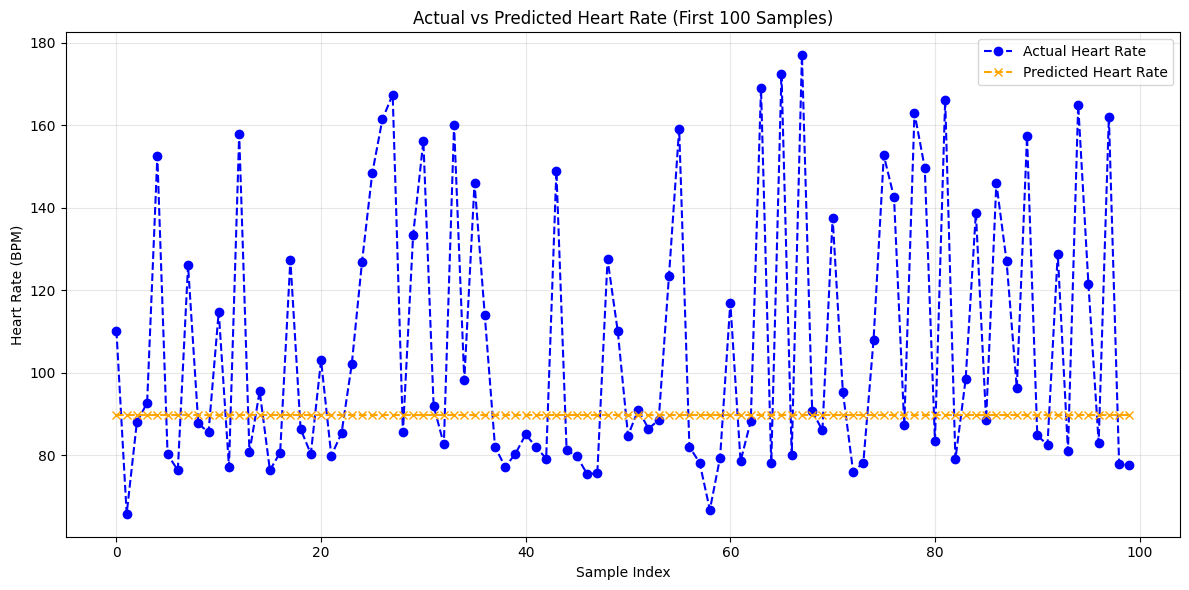

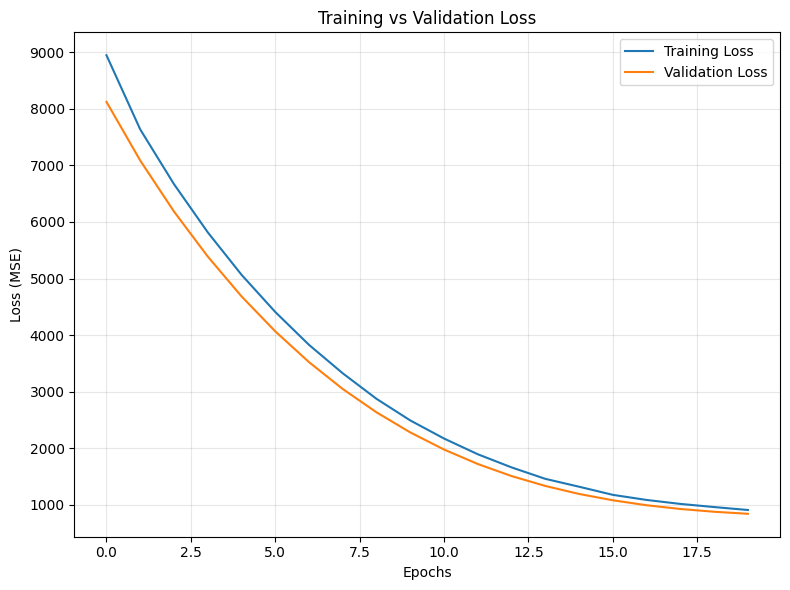

In [9]:
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('lstm_heart_rate_model.h5')

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualization: Actual vs Predicted Heart Rate
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual Heart Rate', color='blue', marker='o', linestyle='dashed')
plt.plot(y_pred[:100], label='Predicted Heart Rate', color='orange', marker='x', linestyle='dashed')
plt.title('Actual vs Predicted Heart Rate (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Heart Rate (BPM)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization: Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# Import libraries
import pandas as pd

# Load the pulse data
pulse_data = pd.read_csv('D:/CodingStorage/flutter/yolodetection/assets/pulse.csv')  # Replace with your actual file path
pulse_data['timestamp'] = pd.to_datetime(pulse_data['timestamp'], unit='ms')  # Convert timestamp
pulse_data.set_index('timestamp', inplace=True)  # Set timestamp as index

# Resample to 1-second intervals
pulse_data = pulse_data.resample('1S').mean()
pulse_data.interpolate(method='linear', inplace=True)

# Define awake/drowsy based on threshold
awake_threshold = 90
pulse_data['state'] = pulse_data['value'].apply(lambda x: 'Awake' if x >= awake_threshold else 'Drowsy')
pulse_data['is_awake'] = pulse_data['state'] == 'Awake'  # Boolean for plotting


C:\Users\Afiq\AppData\Local\Temp\ipykernel_48884\177137379.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  pulse_data = pulse_data.resample('1S').mean()


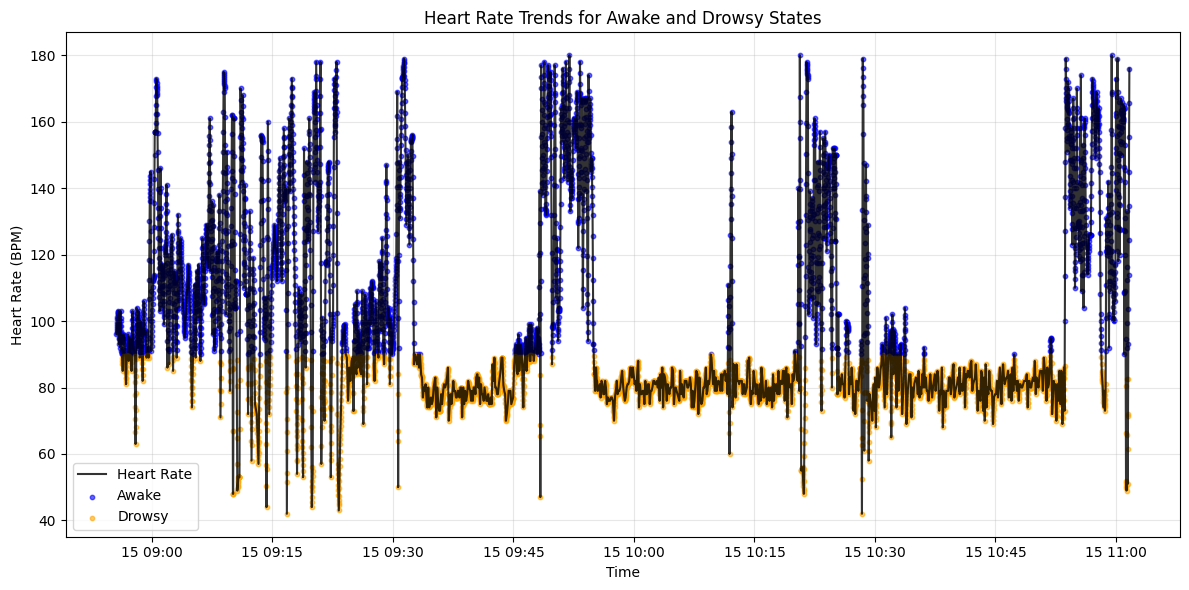

In [11]:
import matplotlib.pyplot as plt

# Separate awake and drowsy states
awake_data = pulse_data[pulse_data['is_awake']]
drowsy_data = pulse_data[~pulse_data['is_awake']]

# Plot heart rate trends
plt.figure(figsize=(12, 6))
plt.plot(pulse_data.index, pulse_data['value'], label='Heart Rate', color='black', alpha=0.8)

# Highlight awake and drowsy states using scatter plot
plt.scatter(awake_data.index, awake_data['value'], color='blue', label='Awake', alpha=0.6, s=10)
plt.scatter(drowsy_data.index, drowsy_data['value'], color='orange', label='Drowsy', alpha=0.6, s=10)

# Add labels and legend


In [ ]:
plt.title('Heart Rate Trends for Awake and Drowsy States')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.legend()
plt.grid(alpha=0.3)


In [ ]:
plt.tight_layout()
plt.show()


In [12]:
%pip install pyserial


  Using cached pyserial-3.5-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import serial
import serial.tools.list_ports
ports = serial.tools.list_ports.comports()
for port in ports:
    print(port.device)
try:
	arduino = serial.Serial('COM9', 9600)  # Replace with your port and baud rate
	print(arduino.readline().decode().strip())
	arduino.close()
except serial.SerialException as e:
	print(f"Error: {e}")


COM3
COM9
COM7
COM4
COM8


In [1]:
import serial.tools.list_ports

ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: {port.device} - {port.description}")


Port: COM3 - Standard Serial over Bluetooth link (COM3)
Port: COM9 - USB Serial Device (COM9)
Port: COM7 - Standard Serial over Bluetooth link (COM7)
Port: COM4 - Standard Serial over Bluetooth link (COM4)
Port: COM8 - Standard Serial over Bluetooth link (COM8)


In [2]:
%pip install websockets


Note: you may need to restart the kernel to use updated packages.


In [ ]:
gcloud builds submit --tag gcr.io/flaskfyp2detection/lstmheartratemonitoring


In [1]:
%pip install esptool

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for esptool: filename=esptool-4.8.1-py3-none-any.whl size=530932 sha256=06001ab24bd6f56dbd9656f00dd3021ebbc4d0aa1feee77c616557fccc5b08f3
  Stored in directory: c:\users\afiq\appdata\local\pip\cache\wheels\f3\9f\d5\7fa247308e9461f7f02b5c750217f179c3b98874ba19f5fd00
Successfully built esptool
Note: you may need to restart the kernel to use updated packages.


In [4]:
%esptool.py --port COM10 erase_flash


UsageError: Line magic function `%esptool.py` not found.
